In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from catboost import CatBoostClassifier
import csv

In [2]:
train  = pd.read_csv(r"C:\Users\raven\datas\wine\train.tsv", delimiter='\t')
test  = pd.read_csv(r"C:\Users\raven\datas\wine\test.tsv", delimiter='\t')

In [3]:
train.head()

,id,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,1,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
2,3,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
3,6,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
4,9,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


<AxesSubplot:>

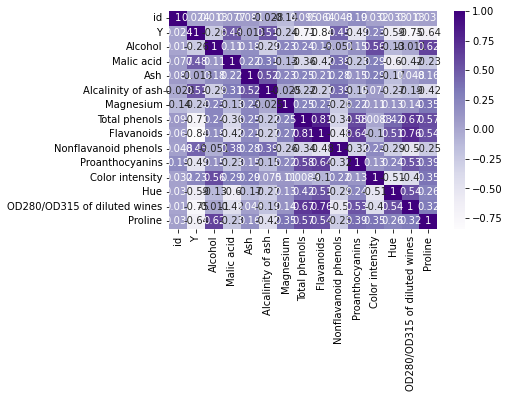

In [4]:
corr_matrix = train.corr()
sns.heatmap(corr_matrix, cmap = 'Purples', annot = True)

In [5]:
cols = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
X = train[cols]
Y = train['Y']

X_test = test[cols]

X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.3, random_state = 1219)

In [6]:
cb = CatBoostClassifier()
cb.fit(X_train, Y_train)

Learning rate set to 0.068665
0:	learn: 1.0522839	total: 133ms	remaining: 2m 12s
1:	learn: 1.0184878	total: 135ms	remaining: 1m 7s
2:	learn: 0.9749533	total: 137ms	remaining: 45.6s
3:	learn: 0.9471715	total: 138ms	remaining: 34.5s
4:	learn: 0.9113685	total: 140ms	remaining: 27.9s
5:	learn: 0.8750218	total: 141ms	remaining: 23.4s
6:	learn: 0.8564244	total: 143ms	remaining: 20.3s
7:	learn: 0.8257999	total: 144ms	remaining: 17.9s
8:	learn: 0.8007971	total: 146ms	remaining: 16.1s
9:	learn: 0.7762515	total: 147ms	remaining: 14.6s
10:	learn: 0.7532286	total: 150ms	remaining: 13.5s
11:	learn: 0.7373455	total: 151ms	remaining: 12.5s
12:	learn: 0.7145444	total: 153ms	remaining: 11.6s
13:	learn: 0.6924722	total: 154ms	remaining: 10.9s
14:	learn: 0.6701277	total: 155ms	remaining: 10.2s
15:	learn: 0.6509959	total: 157ms	remaining: 9.64s
16:	learn: 0.6297456	total: 158ms	remaining: 9.14s
17:	learn: 0.6112419	total: 159ms	remaining: 8.7s
18:	learn: 0.5917637	total: 161ms	remaining: 8.29s
19:	learn: 

In [7]:
Y_pred = cb.predict(X_val)

In [8]:
accuracy_score(Y_val, Y_pred)

0.9629629629629629

In [9]:
cb_submission = cb.predict(X_test)

In [15]:
test['Y'] = cb_submission
test[['id', 'Y']].to_csv("wine_submission.csv", header = False, index = False)